# Data Undersanding

Pada dataset ini terdapat data saham netflix dari tahun 2018 - 2022. Pada dataset tersebut dilakukan prediksi harga saham High dengan model prediksi RNN, LSTM, dan GRU

Terlihat pada visualisasi bahwa saham naik dari tahun 2020 - menuju akhir 2021. Namun pada tahun 2022 saham turun drastis, kemungkinan akibat wabah covid-19. Dimana menyebabkan penurunan ekonomi di segal bidang.

# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tensorflow import keras

from sklearn.model_selection import train_test_split
from keras.layers import GRU, Dropout, SimpleRNN, LSTM, Dense, SimpleRNN, GRU
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import GRU, Dropout, Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bootcamp/NFLX.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
data.shape

(1009, 7)

# Preprocessing

In [ ]:
#Ubah tipe data Date menjadi datetime
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Ambil data High
high_values = data['High'].values.reshape(-1, 1)

In [ ]:
# Standarisasi MinMax
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
# Mengskalakan Data
scaled_high = scaler.fit_transform(high_values)

In [ ]:
# Tambahkan data yang sudah diskalakan ke dalam dataframe
data['Scaled_High'] = scaled_high

In [ ]:
print(data[['High', 'Scaled_High']].head())

         High  Scaled_High
0  267.899994     0.038304
1  266.700012     0.035640
2  272.450012     0.048408
3  267.619995     0.037683
4  255.800003     0.011436


In [ ]:
scaled_high = data['Scaled_High'].values

# EDA

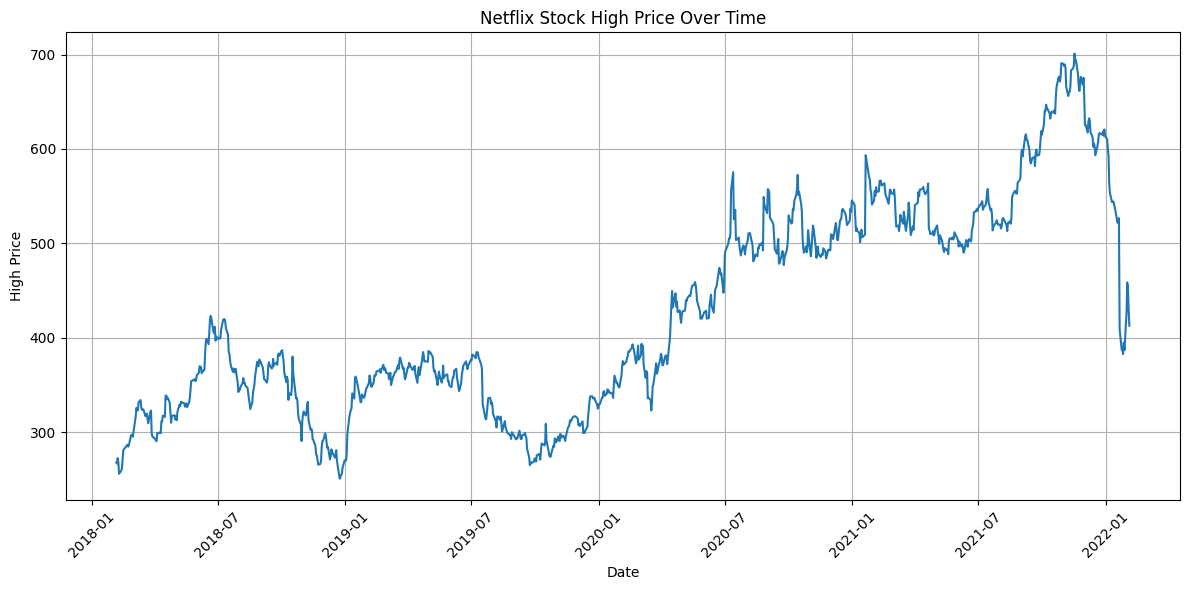

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='High', data=data)  # Use 'data' instead of 'df'
plt.title('Netflix Stock High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Modeling

In [ ]:
# Buat function untuk persiapan data time series, yang dimana list digunakan untuk traindan test
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

# Parameter look_back (jumlah lag untuk time-series)
look_back = 60  # Menggunakan 60 langkah waktu sebelumnya

# Membuat dataset time-series
X, Y = create_dataset(scaled_high, look_back=look_back)

# Membagi data menjadi training dan test set (80% training, 20% test)
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Print Shape
print("Ukuran Data Training:", X_train.shape, Y_train.shape)
print("Ukuran Data Test:", X_test.shape, Y_test.shape)

Ukuran Data Training: (759, 60) (759,)
Ukuran Data Test: (190, 60) (190,)


In [ ]:
# Reshape input to be [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Verifikasi dimensi
print("Dimensi X_train setelah reshape:", X_train_reshaped.shape)
print("Dimensi X_test setelah reshape:", X_test_reshaped.shape)


Dimensi X_train setelah reshape: (759, 60, 1)
Dimensi X_test setelah reshape: (190, 60, 1)


# Prediksi

## RNN


In [ ]:
# Membuat model RNN
rnn_model = Sequential()

In [ ]:
# Menambahkan layer RNN
rnn_model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
rnn_model.add(SimpleRNN(50, return_sequences=False))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Menambahkan layer Dense
rnn_model.add(Dense(25))
rnn_model.add(Dense(1))  # Output layer

In [ ]:
# Compile model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Melatih model
rnn_history = rnn_model.fit(X_train_reshaped, Y_train, validation_data=(X_test_reshaped, Y_test),
                            epochs=100, batch_size=32, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0563 - val_loss: 0.0119
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.6579e-04 - val_loss: 0.0024
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.4100e-04 - val_loss: 0.0022
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.6345e-04 - val_loss: 0.0019
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.5826e-04 - val_loss: 0.0018
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.9161e-04 - val_loss: 0.0016
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.0992e-04 - val_loss: 0.0015
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 6.9030e-04 - val_loss: 0.0017
Epoch 12/100
24/24 ━━━━━

In [ ]:
# Prediksi pada data uji
rnn_predictions = rnn_model.predict(X_test_reshaped)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [ ]:
# Denormalisasi hasil prediksi dan nilai aktual
rnn_predictions = scaler.inverse_transform(rnn_predictions)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

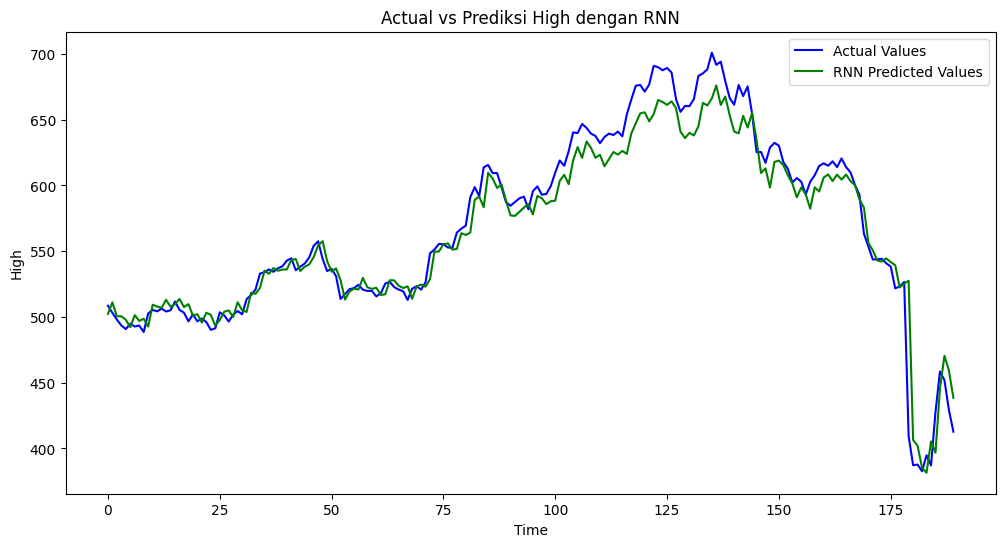

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(Y_test_actual, label='Actual Values', color='blue')
plt.plot(rnn_predictions, label='RNN Predicted Values', color='green')
plt.title('Actual vs Prediksi High dengan RNN')
plt.xlabel('Time')
plt.ylabel('High')
plt.legend()
plt.show()

In [ ]:
rnn_rmse = np.sqrt(mean_squared_error(Y_test_actual, rnn_predictions))
print("RMSE RNN:", rnn_rmse)

RMSE RNN: 13.679203345758074


## LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32) # Adjust epochs and batch_size as needed


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0601
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0058
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0044
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0037
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0048
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0034
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0042
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0041
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0035
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0039
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0042
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0045
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0040
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0030
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/ste

In [ ]:
# Prediksi pada data uji
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


In [ ]:
# Prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [ ]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Train RMSE: %.2f RMSE' % (train_rmse))
print('Test RMSE: %.2f RMSE' % (test_rmse))

Train RMSE: 11.25 RMSE
Test RMSE: 18.28 RMSE


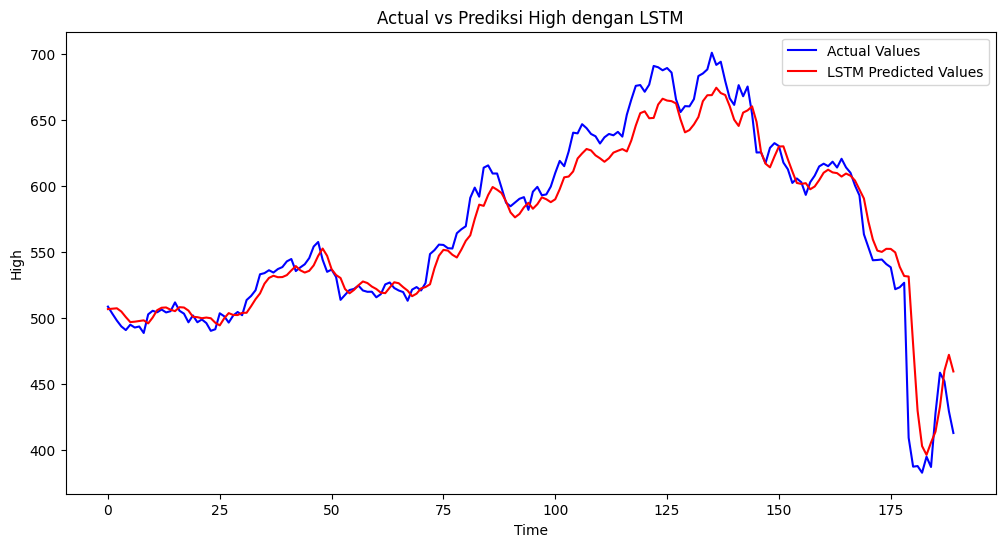

In [ ]:
# prompt: buat visualisasi

# Visualisasi hasil prediksi LSTM
plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], label='Actual Values', color='blue')
plt.plot(test_predict[:,0], label='LSTM Predicted Values', color='red')
plt.title('Actual vs Prediksi High dengan LSTM')
plt.xlabel('Time')
plt.ylabel('High')
plt.legend()
plt.show()

## GRU

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

# Parameter look_back (jumlah lag untuk time-series)
look_back = 60  # Menggunakan 60 langkah waktu sebelumnya

# Membuat dataset time-series
X, Y = create_dataset(scaled_high, look_back=look_back)

# Membagi data menjadi training dan test set (80% training, 20% test)
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Print Shape
print("Ukuran Data Training:", X_train.shape, Y_train.shape)
print("Ukuran Data Test:", X_test.shape, Y_test.shape)

Ukuran Data Training: (759, 60) (759,)
Ukuran Data Test: (190, 60) (190,)


In [ ]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Verifikasi dimensi
print("Dimensi X_train setelah reshape:", X_train_reshaped.shape)
print("Dimensi X_test setelah reshape:", X_test_reshaped.shape)

Dimensi X_train setelah reshape: (759, 60, 1)
Dimensi X_test setelah reshape: (190, 60, 1)


In [ ]:
# Membuat model GRU
gru_model = Sequential()
# Menambahkan layer GRU
gru_model.add(GRU(60, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
gru_model.add(GRU(60, return_sequences=False))
# Menambahkan layer Dense
gru_model.add(Dense(25))
gru_model.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
gru_history = gru_model.fit(X_train_reshaped, Y_train, validation_data=(X_test_reshaped, Y_test),
                            epochs=100, batch_size=32, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0552 - val_loss: 0.0092
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 9.4465e-04 - val_loss: 0.0020
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 9.5288e-04 - val_loss: 0.0019
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 8.4947e-04 - val_loss: 0.0017
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 8.7734e-04 - val_loss: 0.0016
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 7.6456e-04 - val_loss: 0.0016
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 8.2008e-04 - val_loss: 0.0015
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 7.4211e-04 - val_loss: 0.0014
Epoch 12/100
24/24 ━━

In [ ]:
# Prediksi pada data uji
gru_predictions = gru_model.predict(X_test_reshaped)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [ ]:
# Denormalisasi hasil prediksi dan nilai aktual
gru_predictions = scaler.inverse_transform(gru_predictions)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

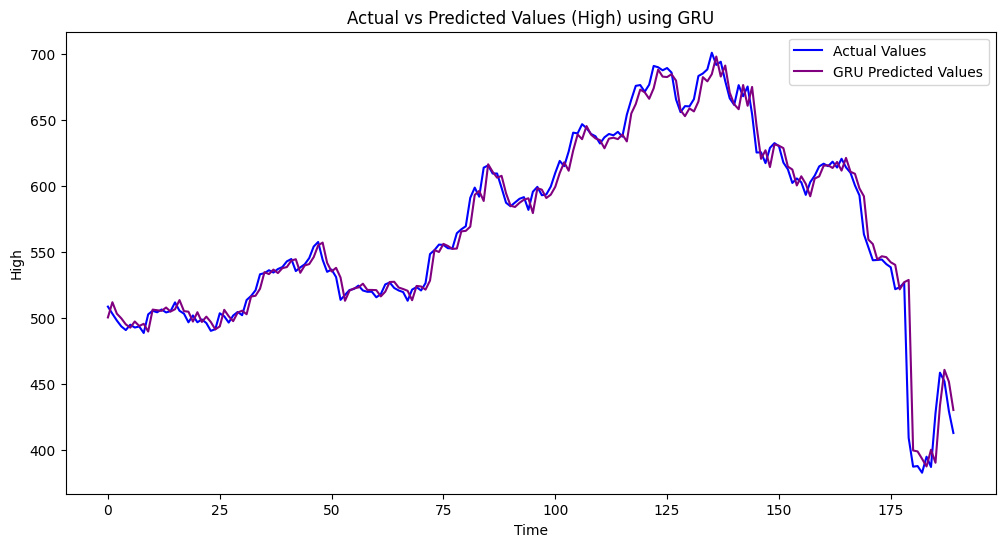

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(Y_test_actual, label='Actual Values', color='blue')
plt.plot(gru_predictions, label='GRU Predicted Values', color='purple')
plt.title('Actual vs Predicted Values (High) using GRU')
plt.xlabel('Time')
plt.ylabel('High')
plt.legend()
plt.show()

In [ ]:
gru_rmse = np.sqrt(mean_squared_error(Y_test_actual, gru_predictions))
print("RMSE GRU:", gru_rmse)

RMSE GRU: 12.553315253650005


# Kesimpulan


In [ ]:
# Pint rsme rnn, lstm, gru

print(f"RMSE RNN: {rnn_rmse}")
print(f"RMSE LSTM: {train_rmse}")
print(f"RMSE GRU: {gru_rmse}")


RMSE RNN: 13.679203345758074
RMSE LSTM: 11.247649934616168
RMSE GRU: 12.553315253650005


Untuk model terbaik pada prediksi dataset netflix stock proce ini adalah LSTM dengan RSME 11.247649934616168
